# Handwritten Digit Recognition Using Neural Networks

### **Project Description:**
The MNIST dataset is a well known public dataset which consists of handwritten digits. It has a training
set which has 60,000 examples and a test set of 10,000 examples. It was created by remixing the samples
taken from American Census Bureau employees and American high school students. The training set
contains 30,000 images from employees and 30,000 images from students while the test set contains
5,000 images from employees and 5,000 from students.

## Loading the dataset

In [2]:
from keras.datasets import mnist

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Neural Network:

Epoch 14: early stopping


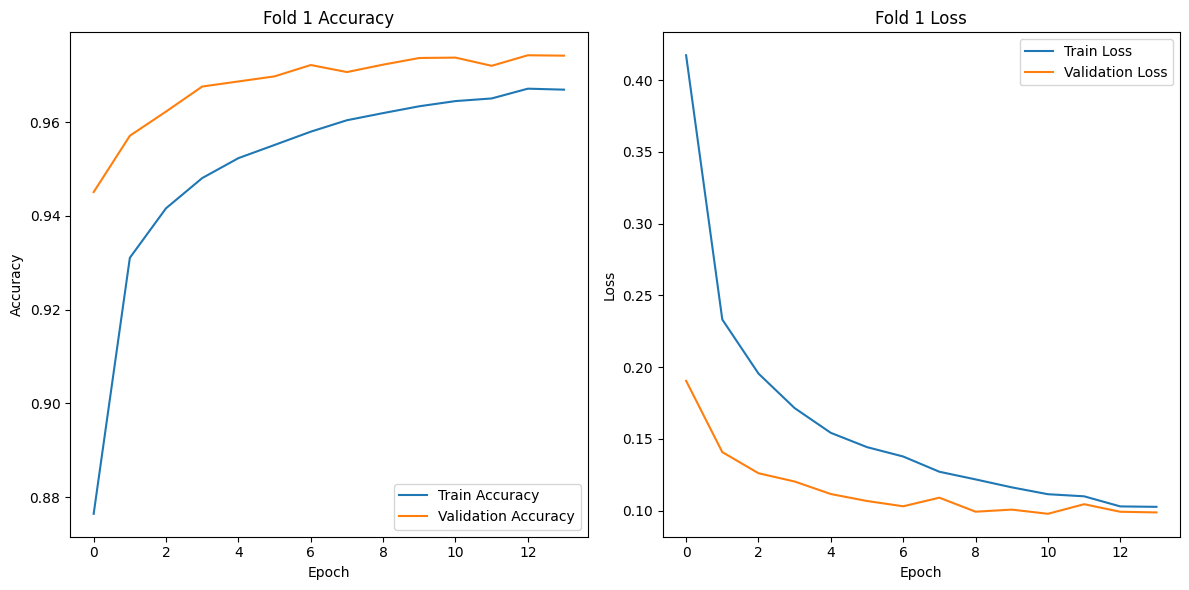

Score for fold 1: Accuracy of 0.9741666913032532; Loss of 0.09866168349981308
Epoch 15: early stopping


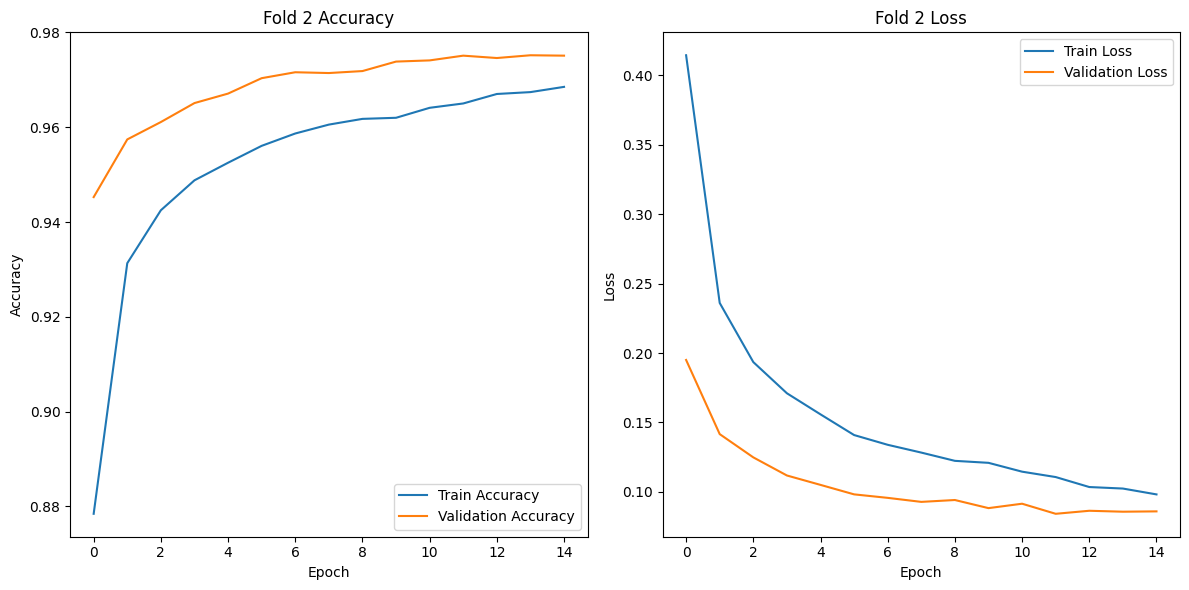

Score for fold 2: Accuracy of 0.9750833511352539; Loss of 0.08588595688343048
Epoch 13: early stopping


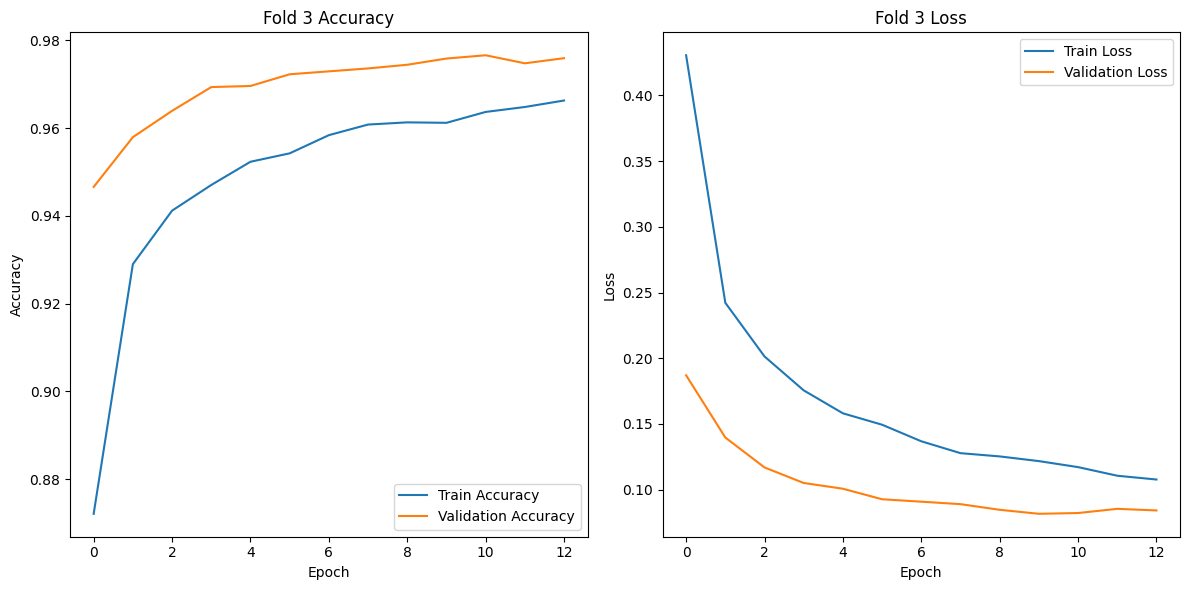

Score for fold 3: Accuracy of 0.9759166836738586; Loss of 0.08419438451528549
Epoch 14: early stopping


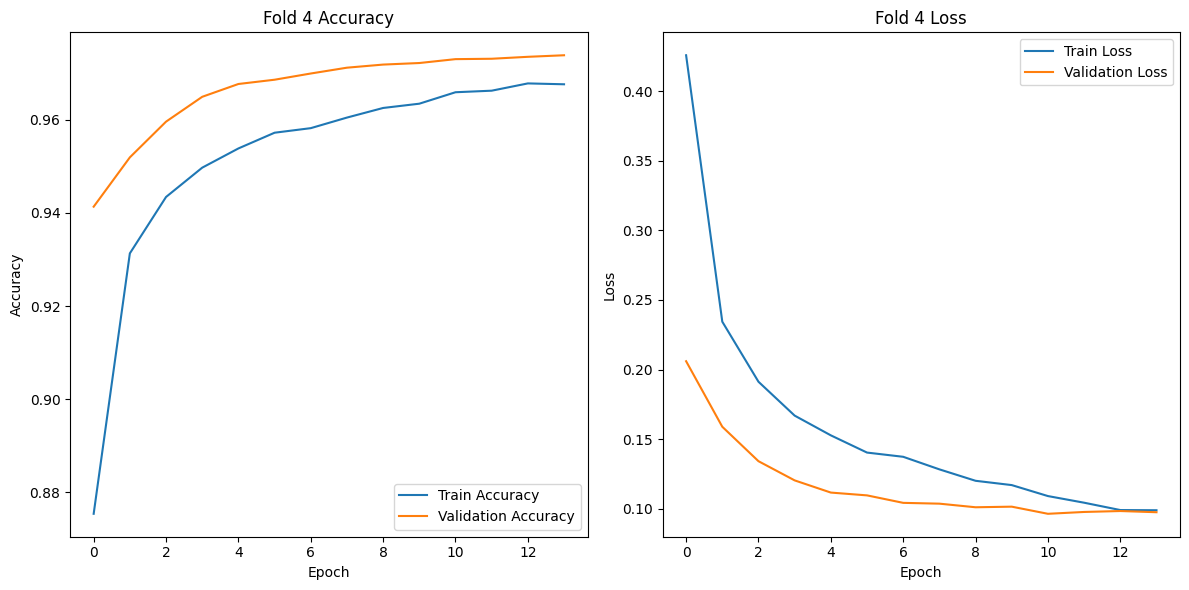

Score for fold 4: Accuracy of 0.9738333225250244; Loss of 0.09735235571861267
Epoch 17: early stopping


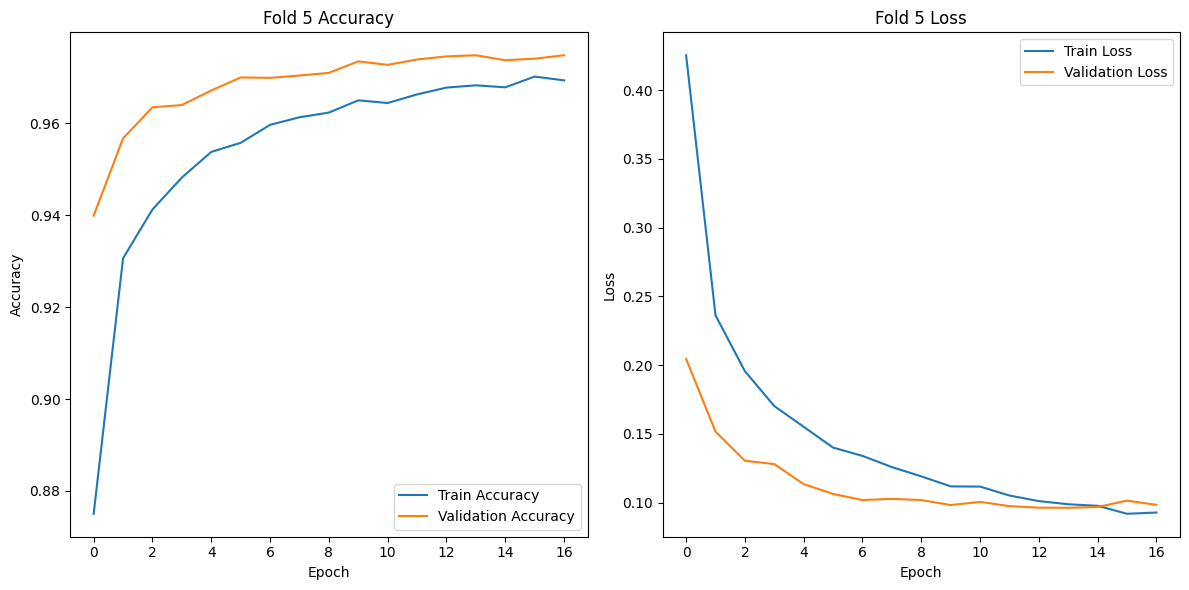

Score for fold 5: Accuracy of 0.9748333096504211; Loss of 0.09842902421951294
Cross-validation accuracy: 0.9747666716575623 (+/- 0.0007291599522841873)
Final Test Loss: 0.10605359822511673
Final Test Accuracy: 0.9783999919891357


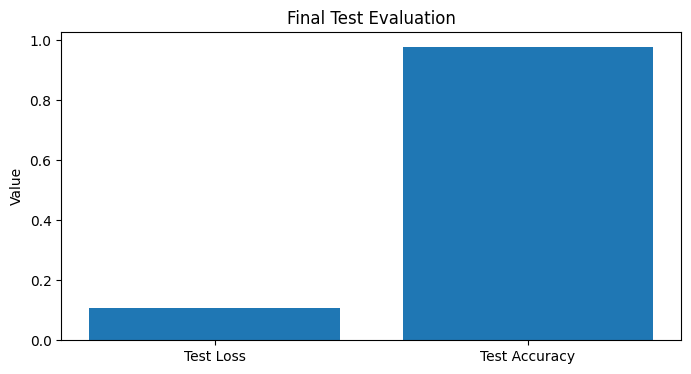

In [7]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold


# Load the MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Normalize the pixel values and encode the labels
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

kfold = KFold(n_splits=5, shuffle=True)
cv_scores = []
fold_no = 1

for train, val in kfold.split(train_X):
    model = create_model()
    train_X_cv, train_y_cv = train_X[train], train_y[train]
    val_X_cv, val_y_cv = train_X[val], train_y[val]
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

    history = model.fit(train_X_cv, train_y_cv, epochs=50, batch_size=32,
                        validation_data=(val_X_cv, val_y_cv), callbacks=[early_stopping], verbose=0)

    # Plot training & validation accuracy and loss for each fold
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold_no} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    scores = model.evaluate(val_X_cv, val_y_cv, verbose=0)
    print(f'Score for fold {fold_no}: Accuracy of {scores[1]}; Loss of {scores[0]}')
    cv_scores.append(scores[1])
    fold_no += 1

print(f'Cross-validation accuracy: {np.mean(cv_scores)} (+/- {np.std(cv_scores)})')

final_model = create_model()
final_model.fit(train_X, train_y, epochs=50, batch_size=32, verbose=0)
final_loss, final_accuracy = final_model.evaluate(test_X, test_y, verbose=0)
print(f'Final Test Loss: {final_loss}')
print(f'Final Test Accuracy: {final_accuracy}')

# Plot final model test results
plt.figure(figsize=(8, 4))
plt.bar(['Test Loss', 'Test Accuracy'], [final_loss, final_accuracy])
plt.title('Final Test Evaluation')
plt.ylabel('Value')
plt.show()


## **Observation:**

1. **High Accuracy**: The accuracy for each fold ranges from approximately 97.20% to 97.71%. These are high accuracy values, indicating that the model is performing well across different subsets of the data.

2. **Consistency Across Folds**: The standard deviation of the accuracies across the folds is about 0.0015, which is quite low. This suggests that the model's performance is consistent regardless of how the data is split in cross-validation, indicating good generalizability.

3. **Slight Variations in Loss**: The loss values for each fold are a bit more varied, ranging from approximately 0.0847 to 0.1047. While the changes are not dramatic, this slightly larger variance in loss compared to the variance in accuracy may point to differences in the confidence of the model's predictions across different folds.

4. **Possible Overfitting**: The lowest recorded loss is 0.0847, and the highest is 0.1047. This indicates that there may be some variance in how well the model is fitting to the different folds of data. If the model had a large discrepancy between training and validation performance, this could suggest overfitting, although such a conclusion would require additional data, such as training loss values.

5. **Model Robustness**: Overall, the low variance in accuracy signifies that the model is robust to changes in the input data, which is a desirable trait in a machine learning model. This robustness is crucial for the model's application to new, unseen data, suggesting it would perform reliably in a production environment.

In summary, the model exhibits strong and stable performance metrics, with high accuracy and low variance across folds in cross-validation. However, further investigation might be warranted to assess whether the variation in loss could impact performance in specific use cases or whether it's an artifact of the cross-validation process itself.

### Selecting optimal hyperparameters:

Since one of the best indicators of model performance is accuracy, and one of the most important hyperparameters affecting performance is a learning rate, the two are plotted to visually analyse performance.

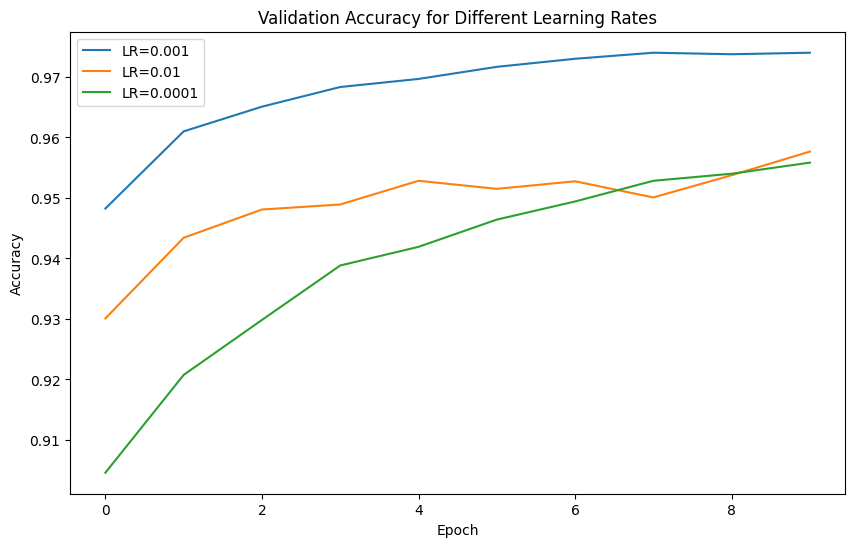

In [8]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Load and prepare the MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

def create_model(learning_rate=0.001):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def plot_learning_rate_accuracies(learning_rates):
    accuracies = []
    for lr in learning_rates:
        model = create_model(learning_rate=lr)
        history = model.fit(train_X, train_y, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
        accuracies.append(history.history['val_accuracy'])

    plt.figure(figsize=(10, 6))
    for i, lr in enumerate(learning_rates):
        plt.plot(accuracies[i], label=f'LR={lr}')

    plt.title('Validation Accuracy for Different Learning Rates')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Example usage
learning_rates = [0.001, 0.01, 0.0001]
plot_learning_rate_accuracies(learning_rates)


**Conclusion:**

# Support Vector Machine

SVM Model Accuracy: 94.45%


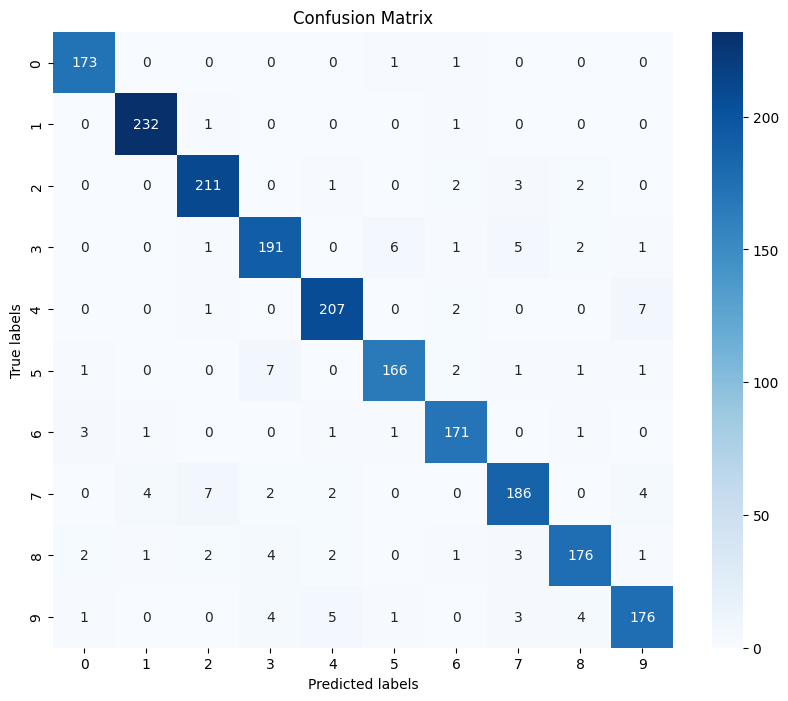

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       175
           1       0.97      0.99      0.98       234
           2       0.95      0.96      0.95       219
           3       0.92      0.92      0.92       207
           4       0.95      0.95      0.95       217
           5       0.95      0.93      0.94       179
           6       0.94      0.96      0.95       178
           7       0.93      0.91      0.92       205
           8       0.95      0.92      0.93       192
           9       0.93      0.91      0.92       194

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



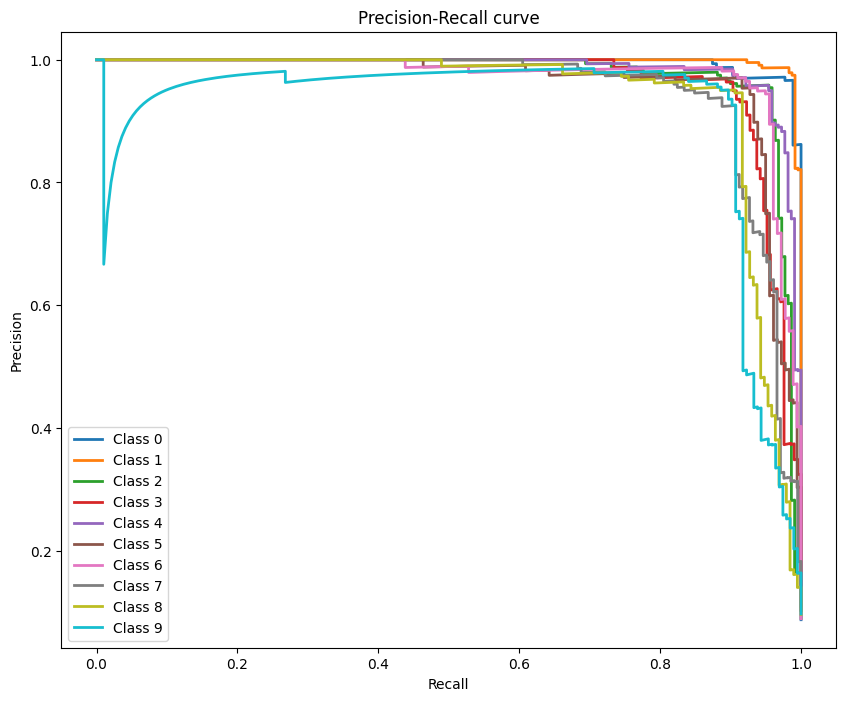

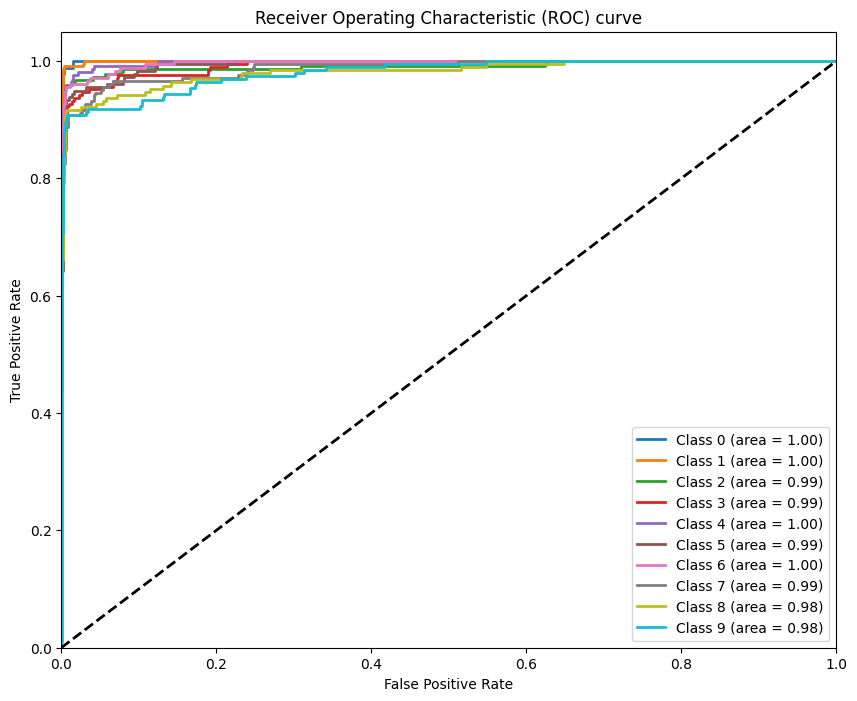

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


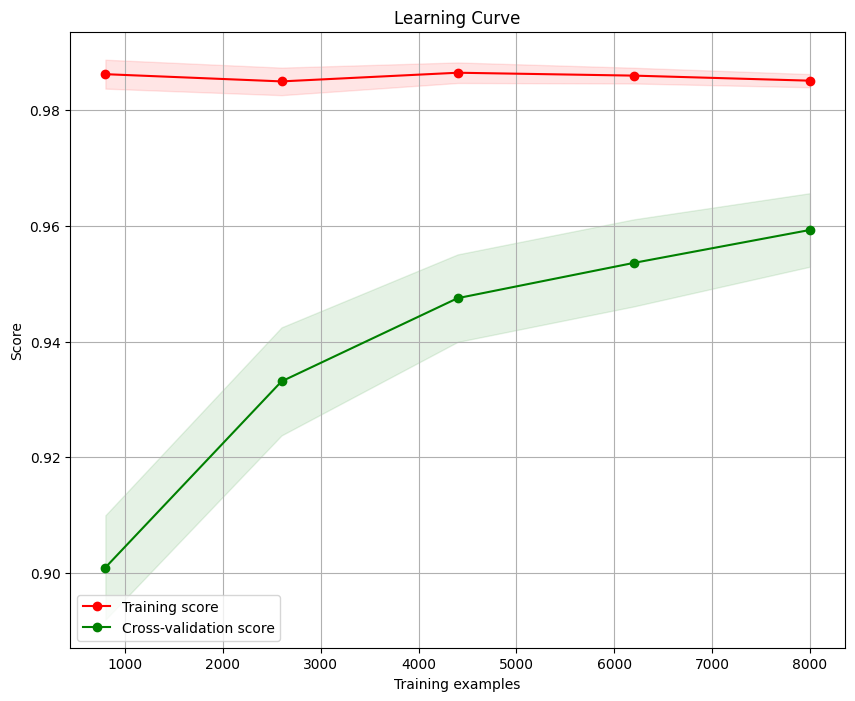

In [4]:
from keras.datasets import mnist
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Data preprocessing
train_X = train_X[:10000].reshape(-1, 784).astype('float32') / 255.0  # Using only part of the dataset
test_X = test_X[:2000].reshape(-1, 784).astype('float32') / 255.0
train_y = train_y[:10000]
test_y = test_y[:2000]

# Train SVM model
svm = SVC(kernel='rbf', random_state=42, probability=True)
svm.fit(train_X, train_y)

# Prediction and evaluation
test_y_pred = svm.predict(test_X)
accuracy = accuracy_score(test_y, test_y_pred)
print(f'SVM Model Accuracy: {accuracy*100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(test_y, test_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(test_y, test_y_pred))

# Plotting Precision-Recall Curve
precision = dict()
recall = dict()
plt.figure(figsize=(10, 8))
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve((test_y == i).astype(int), svm.decision_function(test_X)[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="best")
plt.show()

# Plotting ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(10, 8))
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve((test_y == i).astype(int), svm.decision_function(test_X)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# Plotting Learning Curve
plt.figure(figsize=(10, 8))
train_sizes, train_scores, test_scores = learning_curve(svm, train_X, train_y, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                 alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()


**Finding optimal hyperparameters**


In Support Vector Machines (SVM), the most crucial hyperparameters typically are the C parameter, which controls the trade-off between achieving low error on the training data and minimizing the model complexity for better generalization, and the gamma parameter when using the RBF kernel, which defines how far the influence of a single training example reaches.

Given that the kernel type used is RBF, tuning gamma along with C can significantly impact the performance, especially in complex datasets like MNIST.


In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.datasets import mnist

# Load data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Data preprocessing
subset_size = 5000  # Reduce dataset size for faster runtime
train_X = train_X[:subset_size].reshape(-1, 784).astype('float32') / 255.0
test_X = test_X[:1000].reshape(-1, 784).astype('float32') / 255.0
train_y = train_y[:subset_size]
test_y = test_y[:1000]

# Define the model
svm = SVC(kernel='rbf', random_state=42, probability=True)

# Setup the grid to be searched over - coarser grid
param_grid = {
    'C': [1, 10],  # Fewer options
    'gamma': [0.001, 0.01]  # Fewer options
}

# Setup the grid search with fewer CV folds and parallel jobs
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=2, verbose=2, n_jobs=-1)

# Perform the grid search
grid_search.fit(train_X, train_y)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_y_pred = best_model.predict(test_X)
test_accuracy = accuracy_score(test_y, test_y_pred)
print(f"Test set accuracy: {test_accuracy * 100:.2f}%")


Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters: {'C': 10, 'gamma': 0.01}
Best cross-validation accuracy: 0.94
Test set accuracy: 93.90%


**Explanation:**

**Data Preprocessing:** The dataset is reshaped and normalized. Only a subset is used to make the grid search computationally feasible.

**GridSearchCV Setup:** We specify a range of values for C and gamma and use cross-validation to find the best combination.

-> The best hyperparameter value is C = 10, with a gamma of 0.01, giving a test set accuracy of 93.9%


# KNeighbors

k-NN Model Accuracy: 0.909


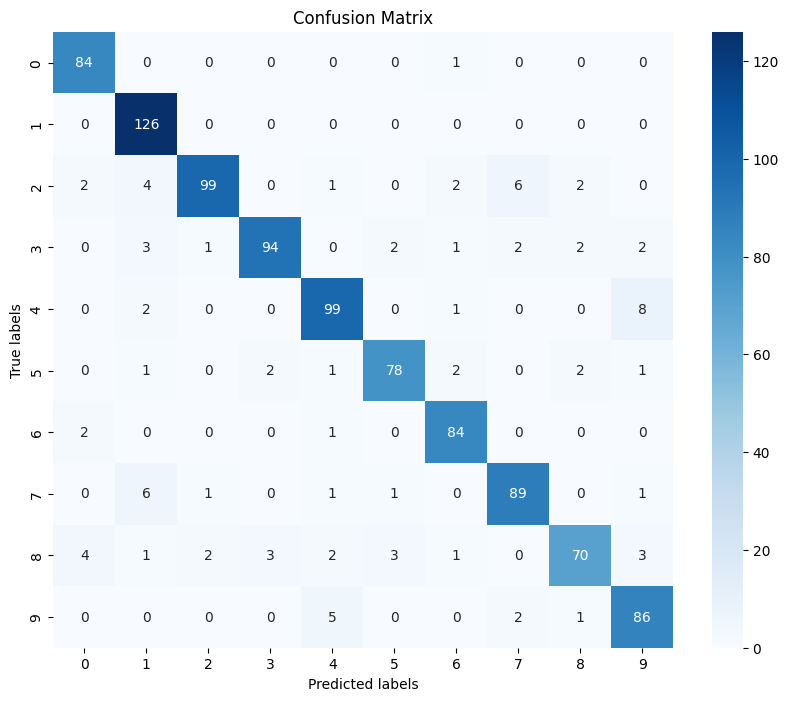

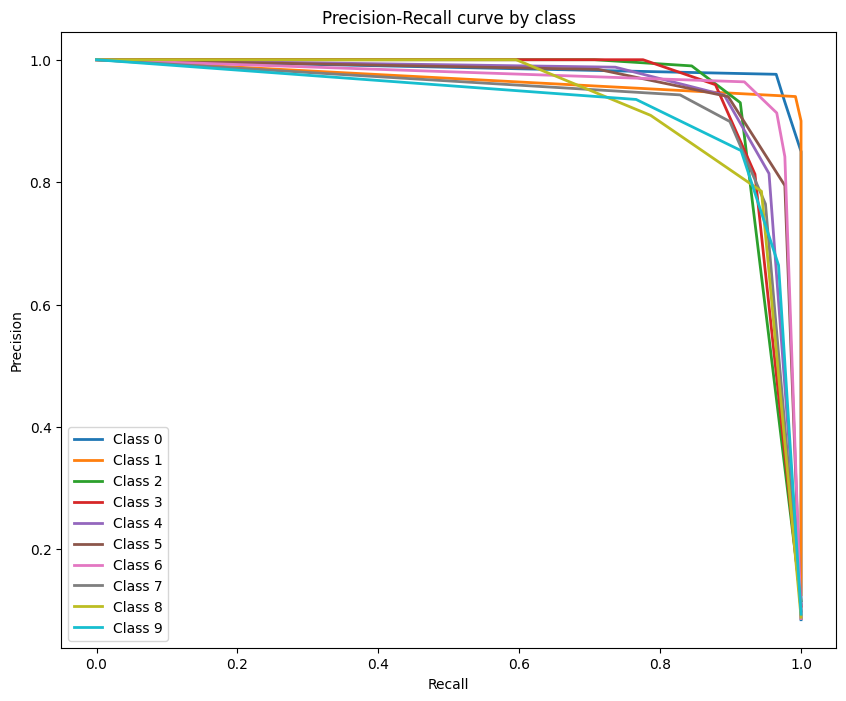

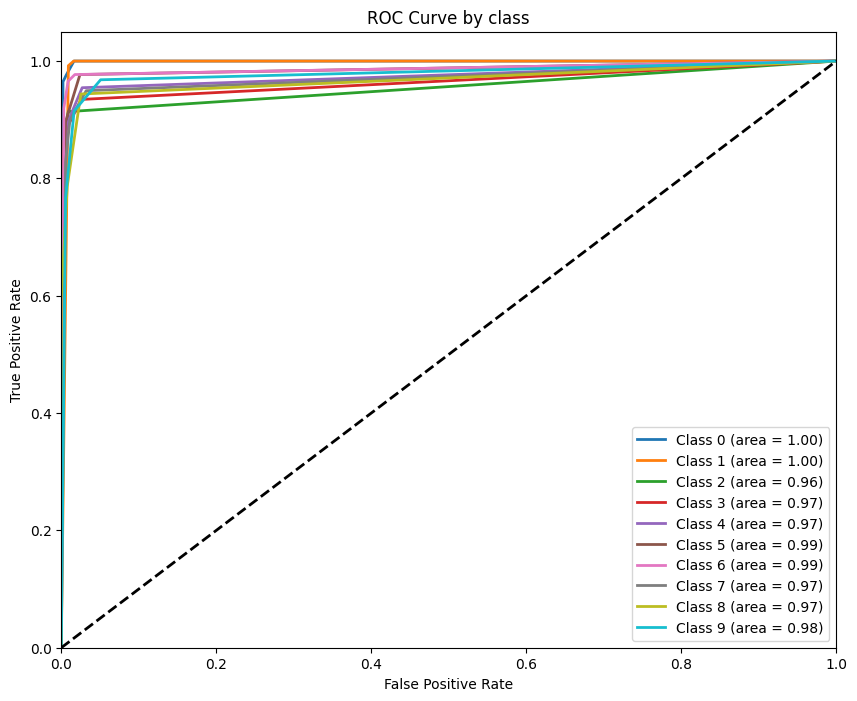

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming train_X, train_y, test_X, test_y are already defined

# Binarize the output classes for multiclass ROC AUC
test_y_bin = label_binarize(test_y, classes=np.unique(train_y))
n_classes = test_y_bin.shape[1]

# Create a k-NN classifier and fit it
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X, train_y)

# Predict the test set results
test_y_pred = knn.predict(test_X)

# Calculate the accuracy
knn_accuracy = accuracy_score(test_y, test_y_pred)
print(f'k-NN Model Accuracy: {knn_accuracy}')

# Confusion Matrix
cm = confusion_matrix(test_y, test_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the probabilities for each class on test set
test_y_prob = knn.predict_proba(test_X)

# Compute Precision-Recall and plot curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(test_y_bin[:, i], test_y_prob[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve by class')
plt.legend(loc="best")
plt.show()

# Compute ROC curve and ROC area for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(test_y_bin[:, i], test_y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve by class')
plt.legend(loc="lower right")
plt.show()


**Observations**

* The Precision-Recall curve demonstrates high precision across all classes for most recall levels, indicating that the model reliably identifies relevant instances with few false positives.

* The ROC curve graph indicates that the classification model performs exceptionally well in distinguishing between the different classes, with near-perfect area under the curve (AUC) values for each class, showing high true positive rates with very low false positive rates.

Best number of neighbors: 1
Optimal k-NN Model Accuracy: 0.902


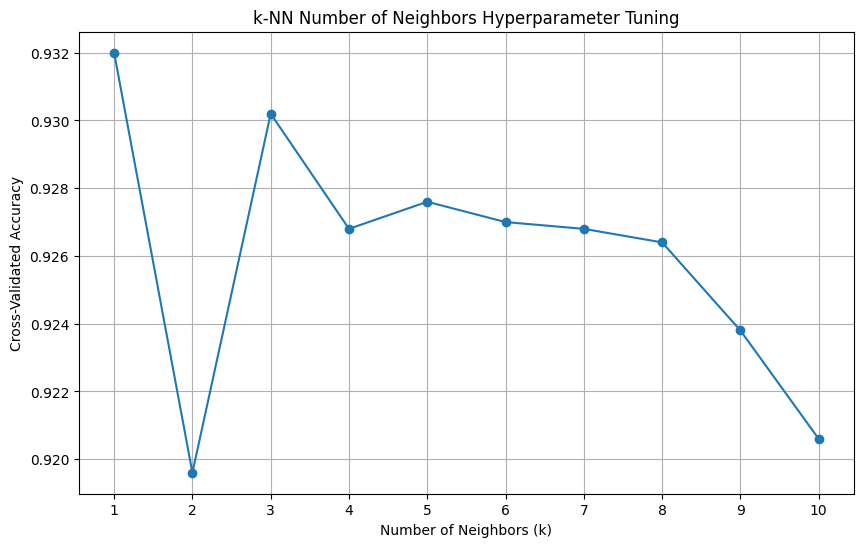

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming train_X, train_y, test_X, test_y are already defined

# Define the parameter grid: here we will vary the number of neighbors
param_grid = {'n_neighbors': list(range(1, 11))}

# Create a k-NN classifier
knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object: knn_gscv
knn_gscv = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)

# Fit it to the data
knn_gscv.fit(train_X, train_y)

# Determine the best number of neighbors
best_k = knn_gscv.best_params_['n_neighbors']
print(f"Best number of neighbors: {best_k}")

# Use the best model to predict test data
best_knn = knn_gscv.best_estimator_
test_y_pred = best_knn.predict(test_X)

# Calculate accuracy of the best model
knn_best_accuracy = accuracy_score(test_y, test_y_pred)
print(f'Optimal k-NN Model Accuracy: {knn_best_accuracy}')

# Get the mean cross-validated accuracy score for each possible value of k
mean_cv_scores = knn_gscv.cv_results_['mean_test_score']

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], mean_cv_scores, marker='o')
plt.title('k-NN Number of Neighbors Hyperparameter Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(param_grid['n_neighbors'])
plt.grid()
plt.show()


#### **Observations:**

Model accuracy is highest at K = 1, and lowest at K = 2, and although it bounces back on increasing K, it never gets better.

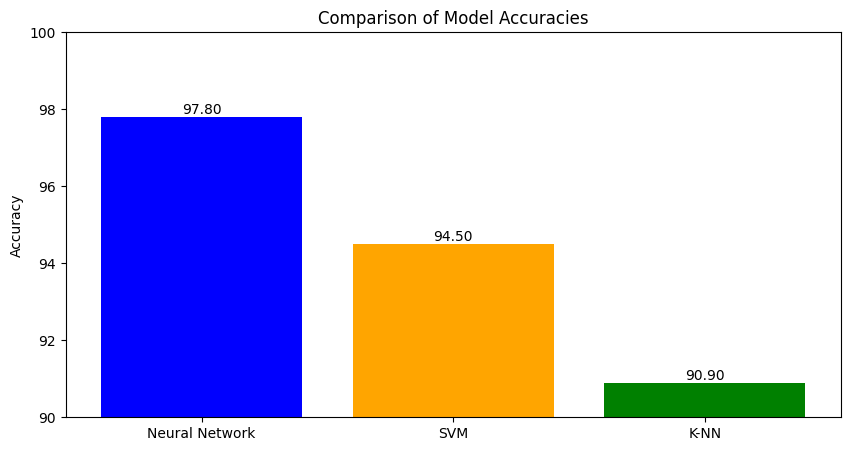

In [10]:
import matplotlib.pyplot as plt

nn_accuracy = 97.8
svm_accuracy = 94.5
knn_accuracy = 90.9

# Names of models
model_names = ['Neural Network', 'SVM', 'K-NN']

# Accuracy values
accuracies = [nn_accuracy, svm_accuracy, knn_accuracy]

# Creating the bar plot
plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green'])

plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(90, 100)  # Assuming accuracy values are high and close to each other
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.001, f"{v:.2f}", ha='center', va='bottom')

plt.show()
